# Module 02: Data Pre-processing

<details><summary><h2>- Learning Objectives:</h2></summary>

- Identify and handle missing values.
- Data Formatting.
- Data Normalization (centering /scaling).
- Data Binning.
- Turning Categorical values to numeric variables.


---

### (A) Identify the data
---

In [3]:
import pandas as pd
import numpy as np

In [24]:
path = '2_Analysing_Python/datasets/testData.csv'
df = pd.read_csv(path) 
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [25]:
# Because, we're reading from `.csv` file, the `NaN` values will be defaulted change to `?`. So, we need to get it back as it is.
df.replace('?', np.nan, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<hr>

### (B) Dealing with the Missing Values in Pyhton
---

<details><summary style='font-size:21px'>How to deal with the missing data?</summary>
    <ul>
        <li><em><b>Check with the data collection source</b></em></li>
        <br>
        <li><em><b>Drop the missing values</b></em>
            <ul>
                <li>drop the variables</li>
                <li>drop the data entry</li>
            </ul>
        </li>
        <br>
        <li><em><b>Replace the missing values</b></em>
            <ul>
                <li>replace it with an average (of similar datapoints).</li>
                <li>replace it with frequency</li>
                <li>replace it based on other functions</li>
            </ul>
        </li>
        <li><em><b>Leave it as missing values</b></em>
    </ul>

#### 1- Drop the missing values
- By using `dataframe.dropna()`: --> `axis=0` for rows, `axis=1` for columns

In [26]:
# Since the `price` column is our target analysis, we don't need to miss with it. That's why we just need to drop the missing values.
df.dropna(subset=['price'], axis=0, inplace=True)

In [7]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### 2- Replace the missing data
- Replaceing the missing data with `avarage` using `dataframe.replace(missing_value, new_value)`:

In [7]:
df['normalized-losses'].count() * 100 / 201

81.59203980099502

In [27]:
# We're going to work on the `normalized-losses` column to replace the missing values with 'mean' of the column.
# mean = df['normalized-losses'].mean(skipna=True) # This line will give you an error since this column identified as non-numeric column.
mean = pd.to_numeric(df['normalized-losses'], errors='coerce').mean() # There's another way, we're going to check that, later.
df['normalized-losses'].replace(np.nan, int(mean), inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [28]:
df['normalized-losses'].value_counts().idxmax()

122

#### Replace the missing data
- Replaceing the missing data with `Most common value` using `dataframe.replace(missing_value, new_value)`:

In [29]:
# Let's check the most common item in `num-of-doors`:
common = df['num-of-doors'].value_counts().idxmax()
common

'four'

In [30]:
# Lets check the missing values in `num-of-doors` and change it with `most common value`:
null_values = df.isnull()
null_values['num-of-doors'].value_counts()

False    199
True       2
Name: num-of-doors, dtype: int64

In [31]:
# It seems to be small number `2 rows`:
df['num-of-doors'].replace(np.nan, common, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<hr>

### (C) Data Formating in Python
---

- Data are usually collected from different places and stored in different formats.

- Bringing data into a common standard of expression allows users to make meaningful comparison.

- **Non-formatted Data**:
    + confusing.
    + Hard to aggregate.
    + hard to compare.

**Example**:

|   City   |    |   Formatted City   |
|:--------:|:--:|:--------:|
|    NY    | ->   | New York |
| New York | -> | New York |
|    N.Y   | ->   | New York |
|   N.Y.   | ->   | New York |

#### 1- correcting Data Formatting
- By using `dataframe.rename(columns={columnsName...}, inplace=True)`

In [32]:
# We've column named 'city-mpg' --> which `miles per gallon`. In some other country it calculates using `liters per 100 kilometers`.
df['city-mpg'] = 235/df['city-mpg']
# Then rename column
df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)
demo = df.loc[:,'city-L/100km':'price'].head()
demo

,city-L/100km,highway-mpg,price
0,11.190476,27,13495
1,11.190476,27,16500
2,12.368421,26,16500
3,9.791667,30,13950
4,13.055556,22,17450


#### 2- Correcting the datatypes
**There're many data types in pandas:**

+ Objects: "A", "Hello"
+ int64, int32: 1,3,5
+ Float64,32: 2.123, 652.652,0.12

**Let's check the datatypes of the dataframe we made after edit the formate of the `city-mpg` to `city-L/100km`.**

*First*, we've to identify the datatype using:
```python
dataframe.dtypes
```
*Second*, convert the datatype to its right datatype using:
```python
dataframe.astypes(datatype)
```

In [13]:
demo.dtypes   # If you notice, `price` column its type suppose to be `int` instead of `object`

city-L/100km    float64
highway-mpg       int64
price            object
dtype: object

In [33]:
df['price'] = df['price'].astype(int)
demo['price'] = demo['price'].astype(int)
demo.dtypes

city-L/100km    float64
highway-mpg       int64
price             int64
dtype: object

### (D) Data Normalization in Python
---

#### Why would we use Normalization?
    
- For make list of consistent variable range.
    
- That's Make some statistical analyses easier down the road.
    
- Making whole data have the same amount of range, make the data also easier to read and process.

**Example**:

| Length | width | height |    | Length/10 | width/10 | height/10 |
|:------:|:-----:|:------:|:--:|:------:|:-----:|:------:|
|  168.8 |  64.3 |  48.3  | -> |  16.88 |  6.43 |  4.83  |
|  168.5 |  66.7 |  52.6  | -> |  16.85 |  6.67 |  5.26  |
|  171.2 |  85.3 |  54.1  | -> |  17.12 |  8.53 |  5.41  |
|  192.6 |  71.2 |  55.8  | -> |  19.26 |  7.12 |  5.58  |
    
---
   
    
**Another Example**:
    
Here, we've columns `age` and `income`, the `income` scale is **1000** times larger than `age`. So, we need to normalize this table. So, for example, if we needed to implement **Linear Regression**, we wouldn't face any problem.
<br>
    

**Not Normalized**
    
- `age` and `income` are in diff range.
    
- hard to compare.
    
- `income` will influence the result more.
    
|     |        |                             |     | Normalized |
|:---:|:------:|:---------------------------:|:---:|:----------:|
| age | income |            Scale            | age |   income/HighesIncome   |
|  20 | 100000 | [[20-40], [20,000-500,000]] | 0.2 |     0.2    |
|  30 |  20000 | [[20-40], [20,000-500,000]] |  0.3 |    0.04    |
|  40 | 500000 | [[20-40], [20,000-500,000]] |  0.4 |      1     |

**Normalized**
    
- similar value range.
    
- similar interinsic influence on analytical model.

#### Methods Of Normalization
---
1. **Decimal Scaling:**
    + X<sub>new</sub> = $\frac{X_{old}}{X_{max}}$ 


2. **Min-Max**: Also, a part of [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling)
    + X<sub>new</sub> = $\frac{X_{old} - X_{min}}{X_{max} - X_{min}}$ 


3. **Z-score**:
    + X<sub>new</sub> = $\frac{{X_{old}} - \mu}{\sigma}$

##### Eample of `Lenght` Table:
| Length | width | height |    | Length/10 | width/10 | height/10 |
|:------:|:-----:|:------:|:--:|:------:|:-----:|:------:|
|  168.8 |  64.3 |  48.3  | -> |  16.88 |  6.43 |  4.83  |
|  168.5 |  66.7 |  52.6  | -> |  16.85 |  6.67 |  5.26  |
|  171.2 |  85.3 |  54.1  | -> |  17.12 |  8.53 |  5.41  |
|  192.6 |  71.2 |  55.8  | -> |  19.26 |  7.12 |  5.58  |
    

In [34]:
## We will work on the `length` table...
# 1- Simple Feature Scaling
df['length'] = df['length'] / df['length'].max()
# 2- Min-Max
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())
# 3- Z-score
df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()

### (E) Binning in Python
---
- Binning: Gouping of values into **"bins"**.
- convert **numeric** into **categorical values**.
- Group a set of **numerical values** a set of **"bins"**.
- `price` is a feature range from 50,000 to 45,000.
(in order to have a *better representation* of price) ---> we have to categorize the column into 3 bins ('low', 'mid', 'high')

In [35]:
# First let's check how many values in price column.
print(f'No. of Unique prices: {df.price.nunique()}') # price has 186 unique values
print(f'Lowest price: {df.price.min()}')
# df['price'].max()

No. of Unique prices: 186
Lowest price: 5118


- We've `186` unique values.
- we want to categorize them into `3`bins: **Low**, **Medium**, **High**
- so, we would like 3 bins of **equal binwidth**, so, we need `4` numbers as dividers `(n+1)` that are equal distance apart.

**Let's create our bins,**

**Min value**: 5118

**Max value**: 45,400

So, if we need to create bins to seperate it into 3 bins, we've to work into 4 exact set of numbers to integrate them with our bins.

###### How to do that?
If we've set of number starts from [0, 12] and we need to seperate them into 3 bins. It should look like that..
- From bins[0, 3] --> This will be the `Low Values`.
- From bins[4, 7] --> This will be the `Medium Values`.
- From bins[8-12] --> This will be the `High Values`.

In [38]:
bins = np.linspace(df['price'].min(), df['price'].max(), 4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [39]:
# Bins: 
#     Low: bins[5118, 18545.33333333]
#     Medium: bins[18546, 31972.66666667]
#     High: bins[31973, 45400]

group_labels = ['low', 'medium', 'high']
df['Grouped-price'] = pd.cut(df['price'], bins, labels=group_labels, include_lowest=True)
df.sort_values(by='price',axis=0, ascending=True, inplace=True)
df[['price','Grouped-price']] 

,price,Grouped-price
138,5118,low
18,5151,low
50,5195,low
150,5348,low
76,5389,low
...,...,...
17,36880,high
128,37028,high
73,40960,high
16,41315,high


Text(0, 0.5, 'Prices')

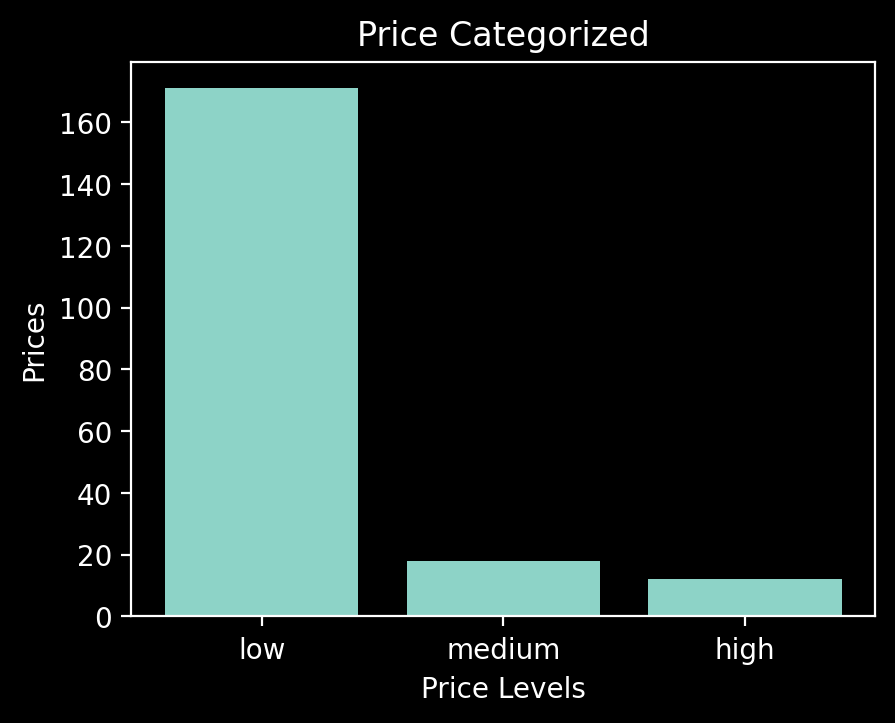

In [40]:
# Let's view our data into an histogram
import matplotlib.pyplot as plt

plt.title('Price Categorized')
plt.bar(group_labels, df['Grouped-price'].value_counts()) # The hist helps you to visualize the distribution of data for getting information,
#                                                           which indicates that most of cars has low price and only very few cars have much higher. 
plt.xlabel('Price Levels')
plt.ylabel('Prices')

### (F) Indicator variable (or Dummy variable)
---
**What's the indicator variable?**

- An indicator variable (or Dummy variable) is a numerical variable used to label categories. They are called `dummies` because the numbers themselves don't have inherent meaning.

**Why we use indicator variables?**

- So, we can use categorical variables for regression analysis in later modules.

**Example**

> We see the column '**fuel-type**' has two unique values, `gas` or `diesel`. Regression doesn't understand words, only numbers.
> To use this attribute in regression anaylsis, we convert '**fuel-type**' into indicator variables.

We're going to use pandas's method `pandas.get_dummies()` to assign numerical values to different categories of fuel type.


In [41]:
dummy_var = pd.get_dummies(df['fuel-type'])
dummy_var.head()

,diesel,gas
138,0,1
18,0,1
50,0,1
150,0,1
76,0,1


In [42]:
# after getting the dummies data, we need to rename both columns
dummy_var.rename(columns={'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace=True)
dummy_var.head()

,fuel-type-diesel,fuel-type-gas
138,0,1
18,0,1
50,0,1
150,0,1
76,0,1


In [43]:
# Now, we need to concatenate the 2 columns with the main table and drop the dummy column 'fuel-type'
df = pd.concat([df, dummy_var], axis=1)
df.drop('fuel-type', axis=1, inplace=True)

In [44]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,Grouped-price,fuel-type-diesel,fuel-type-gas
138,2,83,subaru,std,two,hatchback,fwd,front,93.7,-1.404054,...,2.36,9.0,69,4900,7.580645,36,5118,low,0,1
18,2,121,chevrolet,std,two,hatchback,fwd,front,88.4,-2.686295,...,3.03,9.5,48,5100,5.000000,53,5151,low,0,1
50,1,104,mazda,std,two,hatchback,fwd,front,93.1,-1.225514,...,3.15,9.0,68,5000,7.833333,31,5195,low,0,1
150,1,87,toyota,std,two,hatchback,fwd,front,95.7,-1.257976,...,3.03,9.0,62,4800,6.714286,39,5348,low,0,1
76,2,161,mitsubishi,std,two,hatchback,fwd,front,93.7,-1.371592,...,3.23,9.4,68,5500,6.351351,41,5389,low,0,1


In [46]:
# Let's save the current level we reached:
df.to_csv('2_Analysing_Python/datasets/EditedtestData.csv', index=False)
print('The File has been successfully saved!')

The File has been successfully saved!
